**Omar's Observations**
---------------
1) Average fares are lower in Urban cities when compared to Rural and Suburban cities; however, there are many more Urban drivers and riders than in Suburban and Rural cities.

2) Urban fares accounted for approximately 62% of the total fares collected over the time period; well above the Suburban (30.5%) and Rural (6.8%)

3) Rides provided in Urban cities accounted for approximately 68% of the total rides over the time period observed; well above the Suburban (26.3%) and Rural (5.3%) share of total rides.

4) The vast majority of the drivers are in Urban cities (81% of total drivers).

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [2]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [3]:
# Check to see the data was pulled in, and then understand the general characteristics of the data
city_data_df.head()
city_data_df.columns

Index(['city', 'driver_count', 'type'], dtype='object')

In [4]:
# Check to see the data was pulled in, and then understand the general characteristics of the data
ride_data_df.head()
ride_data_df.columns

Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [15]:
# Combine the data into a single dataset
combined_df = ride_data_df.merge(city_data_df, on='city', how='left')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

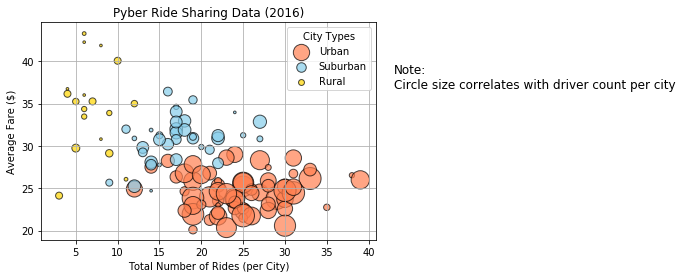

In [55]:
### Challenges: 1) scaling of bubbles is off, 2) print the comment

# Obtain the x and y coordinates for each of the three city types
# x axis = Total # of Rides (per City)
grouped_cities = combined_df.groupby(['city', 'type'])
bubble_size = grouped_cities['city', 'driver_count'].mean()

# Urban, suburban, rural
total_rides_urban = combined_df.loc[combined_df['type'] == 'Urban', ['city', 'driver_count', 'fare']]
x_urban = total_rides_urban.groupby(['city','driver_count']).count()
y_urban = total_rides_urban.groupby(['city','driver_count']).mean()
s_urban = y_urban.index.get_level_values(1).values

total_rides_suburban = combined_df.loc[combined_df['type'] == 'Suburban', ['city', 'driver_count', 'fare']]
x_suburban = total_rides_suburban.groupby(['city','driver_count']).count()
y_suburban = total_rides_suburban.groupby(['city','driver_count']).mean()
s_suburban = y_suburban.index.get_level_values(1).values

total_rides_rural = combined_df.loc[combined_df['type'] == 'Rural', ['city', 'driver_count', 'fare']]
x_rural = total_rides_rural.groupby(['city','driver_count']).count()
y_rural = total_rides_rural.groupby(['city','driver_count']).mean()
s_rural = y_rural.index.get_level_values(1).values

# # Build the scatter plots for each city types
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x_urban, y_urban, s=s_urban*7, c='coral', alpha=.7, label='Urban', linewidths=1, edgecolor='black')
ax1.scatter(x_suburban, y_suburban, s=s_suburban*7, c='skyblue', alpha=.7, label='Suburban', linewidths=1, edgecolor='black')
ax1.scatter(x_rural, y_rural, s=s_rural*7, c='gold', alpha=.7, label='Rural', linewidths=1, edgecolor='black')

# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size

plt.legend(loc='upper right');

textstr = 'Note:\nCircle size correlates with driver count per city\n'
# print(textstr)
plt.text(43,35,textstr, fontsize=12)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend(title='City Types')

# # Save Figure
plt.savefig("../Images/Pyber_HW_Omar1.png", edgecolor='none', bbox_inches = 'tight', orientation='landscape')

plt.show()

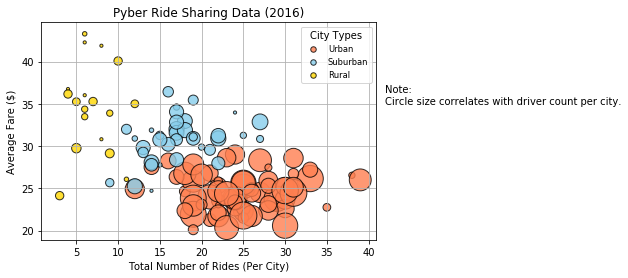

In [3]:
# Show plot
# plt.show()

## Total Fares by City Type

C:\Users\Omar\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


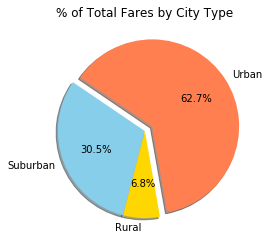

In [97]:
# Calculate Type Percents
total_fares = combined_df['fare'].sum()

fares_urban = combined_df.loc[combined_df['type'] == 'Urban', ['fare']].sum()
fares_suburban = combined_df.loc[combined_df['type'] == 'Suburban', ['fare']].sum()
fares_rural = combined_df.loc[combined_df['type'] == 'Rural', ['fare']].sum()

fares_urban_pct = fares_urban / total_fares
fares_suburban_pct = fares_suburban / total_fares
fares_rural_pct = fares_rural / total_fares

labels = ["Urban", "Suburban", "Rural"]

sizes = [fares_urban_pct, fares_suburban_pct, fares_rural_pct]

colors = ["coral", "skyblue", "gold"]

explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("../Images/Pyber_HW_Omar2.png")

plt.show()



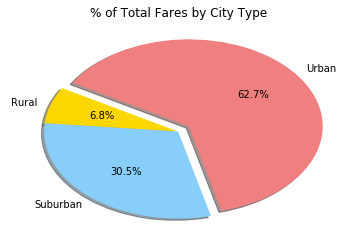

In [4]:
# Show Figure
# plt.show()

## Total Rides by City Type

C:\Users\Omar\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


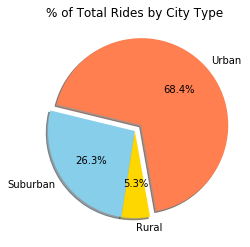

In [98]:
# Calculate Ride Percents
total_rides = combined_df['ride_id'].count()

rides_urban = combined_df.loc[combined_df['type'] == 'Urban', ['ride_id']].count()
rides_suburban = combined_df.loc[combined_df['type'] == 'Suburban', ['ride_id']].count()
rides_rural = combined_df.loc[combined_df['type'] == 'Rural', ['ride_id']].count()

rides_urban_pct = rides_urban / total_rides
rides_suburban_pct = rides_suburban / total_rides
rides_rural_pct = rides_rural / total_rides

labels = ["Urban", "Suburban", "Rural"]

sizes = [rides_urban_pct, rides_suburban_pct, rides_rural_pct]

colors = ["coral", "skyblue", "gold"]

explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("../Images/Pyber_HW_Omar3.png")

plt.show()


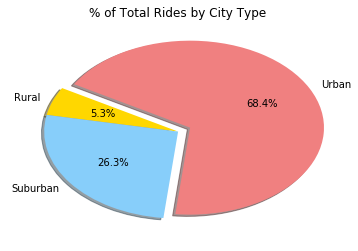

In [5]:
# Show Figure
# plt.show()

## Total Drivers by City Type

C:\Users\Omar\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


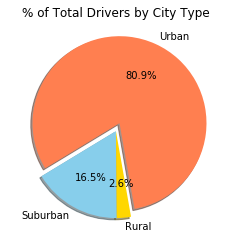

In [99]:
# Calculate Driver Percents
total_drivers = city_data_df['driver_count'].sum()

drivers_urban = city_data_df.loc[city_data_df['type'] == 'Urban', ['driver_count']].sum()
drivers_suburban = city_data_df.loc[city_data_df['type'] == 'Suburban', ['driver_count']].sum()
drivers_rural = city_data_df.loc[city_data_df['type'] == 'Rural', ['driver_count']].sum()

drivers_urban_pct = drivers_urban / total_drivers
drivers_suburban_pct = drivers_suburban / total_drivers
drivers_rural_pct = drivers_rural / total_drivers

labels = ["Urban", "Suburban", "Rural"]

sizes = [drivers_urban_pct, drivers_suburban_pct, drivers_rural_pct]

colors = ["coral", "skyblue", "gold"]

explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("../Images/Pyber_HW_Omar4.png")

plt.show()

# Build Pie Charts

# Save Figure


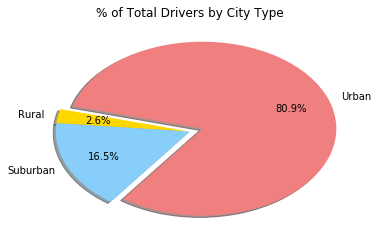

In [6]:
# Show Figure
plt.show()